# **Рубежный контроль 1**

## Вариант 11, Козлов Егор, ИУ5-62Б

## 1. Описание задачи. Датасет

#### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.

Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV, столбцы разделены табуляцией

In [3]:
data = pd.read_csv('./toy_dataset.csv', sep=",")

In [4]:
# Изучим содержание
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [5]:
# Список колонок с типами данных
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [6]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Number - 0
City - 0
Gender - 0
Age - 0
Income - 0
Illness - 0


### Закодируем категориальные признаки

- Мы имеем 3 категориальных признака: пол, город, наличие заболевания. 
- Пол и город не имеет смысла кодировать, так как это создаст ложный эффект роста, а города равноценны между собой по значению, как и пол, такие признаки лучше исследовать методом дисперсионного анализа ANOVA. 
- Наличия заболевания можно закодировать и это не должно сказаться на разведочном анализе в виде ложных результатов, так как это данные вида Yes-No или True-False. 
- Для этих целей нам подойдет простой LabelEncoder

In [7]:
# Посмотрим список уникальных значений заболевания
data.Illness.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
# создадим объект класса нашего LabelEncoder и получим с помощью метода этого класса закодированный массив колонки заболеваний
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_enc_le = le.fit_transform(data['Illness'])
np.unique(data_enc_le)

array([0, 1])

In [9]:
# метод для декодирования наших значений
le.inverse_transform([0, 1])

array(['No', 'Yes'], dtype=object)

In [10]:
# присоединим к нашему датафрейму колонку закодированных значений болезни(Illness)
data['enc_Illness'] = data_enc_le
data.head(15)

,Number,City,Gender,Age,Income,Illness,enc_Illness
0,1,Dallas,Male,41,40367.0,No,0
1,2,Dallas,Male,54,45084.0,No,0
2,3,Dallas,Male,42,52483.0,No,0
3,4,Dallas,Male,40,40941.0,No,0
4,5,Dallas,Male,46,50289.0,No,0
5,6,Dallas,Female,36,50786.0,No,0
6,7,Dallas,Female,32,33155.0,No,0
7,8,Dallas,Male,39,30914.0,No,0
8,9,Dallas,Male,51,68667.0,No,0
9,10,Dallas,Female,30,50082.0,No,0


### Задача 2
Для заданного [набора данных](https://www.kaggle.com/datasets/carlolepelaars/toy-dataset?resource=download). проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

### Пустых значений в датасете нет - значит необходимо их создать для задания

In [11]:
# создадим массив индексов записей датасета, случайно выбранные с помощью np.random.choice()
# под эти индексы в датафрейм вставим NaN-значения
# 1ый аргумент максимальный целочисленный индекс, второй - размер выборки
chosen_idx_Income = np.random.choice(data.Number.max(), size = int(data.Number.max() * 0.09))
chosen_idx_Gender = np.random.choice(data.Number.max(), size = int(data.Number.max() * 0.07))
chosen_idx_Income, chosen_idx_Gender

(array([ 73709, 112544,  35025, ...,  60374, 100660,  30372]),
 array([ 18128,  83938,   2816, ...,  64486,  15935, 136931]))

In [19]:
# используем NaN, т.к. pandas автоматически преобразовывает None к NaN автоматически
from numpy import NaN

# скопируем наш датафрейм и вставим пропуски в копию
data_with_gaps = data

# вставка пропусков в Income
for i in chosen_idx_Income:
    data_with_gaps.Income[i] = NaN
    
# вставка пропусков в Gender
for i in chosen_idx_Gender:
    data_with_gaps.Gender[i] = NaN

data_with_gaps.head(15)

C:\Users\kozlo\AppData\Local\Temp\ipykernel_12592\2411161585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_gaps.Income[i] = NaN
C:\Users\kozlo\AppData\Local\Temp\ipykernel_12592\2411161585.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_gaps.Gender[i] = NaN


,Number,City,Gender,Age,Income,Illness,enc_Illness
0,1,Dallas,Male,41,40367.0,No,0
1,2,Dallas,Male,54,45084.0,No,0
2,3,Dallas,Male,42,52483.0,No,0
3,4,Dallas,Male,40,40941.0,No,0
4,5,Dallas,Male,46,NaN,No,0
5,6,Dallas,Female,36,50786.0,No,0
6,7,Dallas,Female,32,33155.0,No,0
7,8,Dallas,Male,39,30914.0,No,0
8,9,Dallas,Male,51,68667.0,No,0
9,10,Dallas,Female,30,NaN,No,0


### Задача №1
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

C:\Users\kozlo\AppData\Local\Temp\ipykernel_12592\344715589.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<AxesSubplot:>

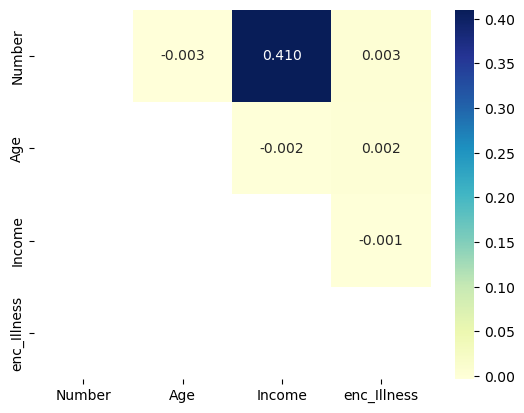

In [13]:
# Треугольный вариант мат<AxesSubplot:xlabel='City', ylabel='Income'>
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f', cmap='YlGnBu')

Можем заметить, что никаких значимых корреляций внутри числовых признаков и закодированного заболевания нет. Детальнее проанализируем в задании 4.

### Задача №4
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?

In [14]:
# Узнаем списки уникальных значений для наших категориальных признаков
print(data.City.unique())
print(data.Illness.unique())
print(data.Gender.unique())


['Dallas' 'New York City' 'Los Angeles' 'Mountain View' 'Boston'
 'Washington D.C.' 'San Diego' 'Austin']
['No' 'Yes']
['Male' 'Female']


### Построим гистограмму распределения признака возраста в зависимости от пола

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


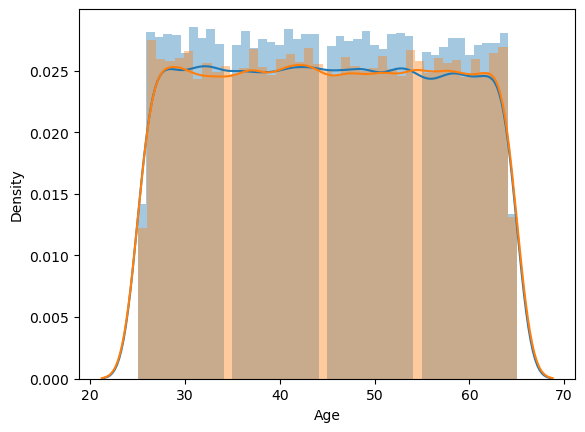

In [15]:
sns.distplot(data.loc[data['Gender'] == 'Male']['Age'])
sns.distplot(data.loc[data['Gender'] == 'Female']['Age'])
plt.show()

In [16]:
data.Age.min()

25

Можем увидеть, что распределение возрастов внутри каждого пола близко к равномерному

TypeError: inner() got multiple values for argument 'ax'

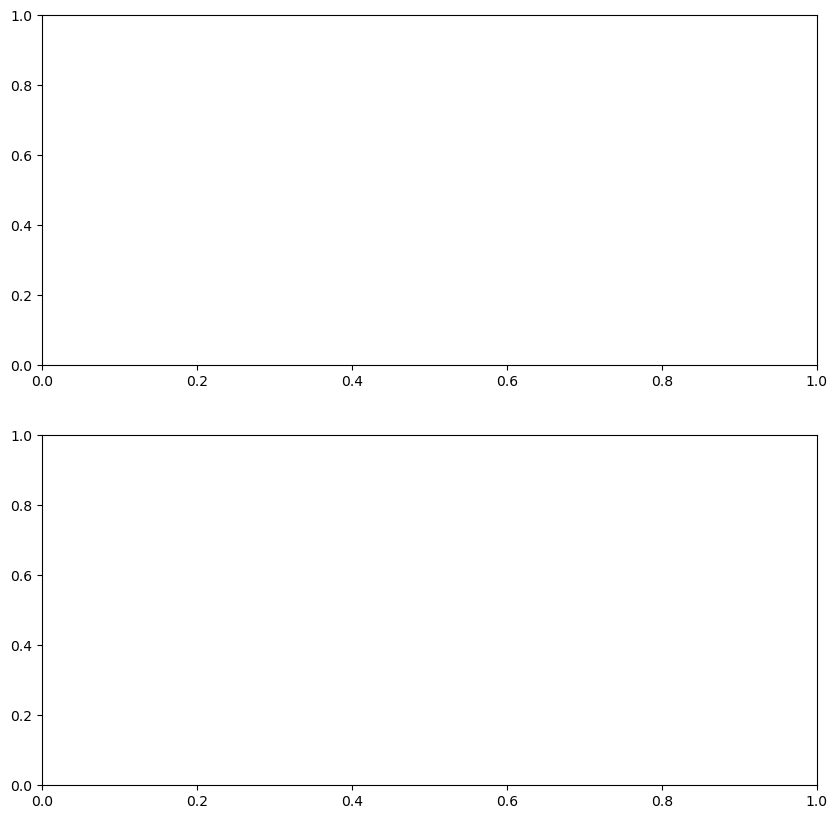

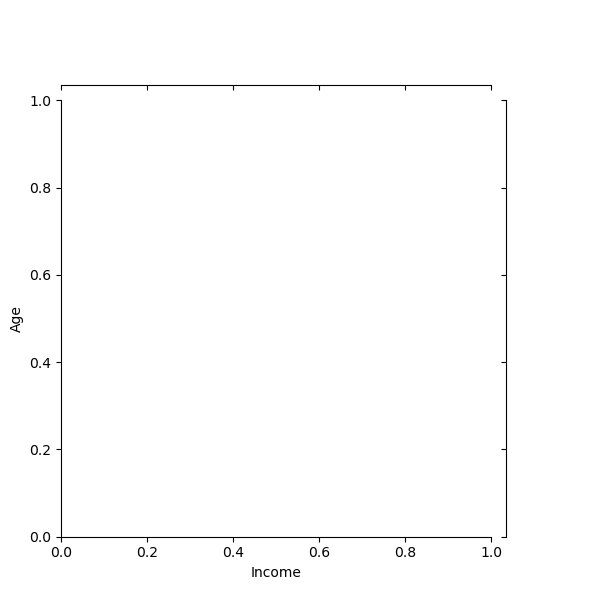

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

sns.jointplot(x='Income', y='Age', data=data, ax=ax[0],  kind="hex")
sns.jointplot(x='Income', y='Age', data=data, ax=ax[1],  kind="hex")


На этом графике видно, что распределение дохода внутри возрастов близко к нормальному, больше всего в каждой возрастной группе людей среднего достатка

<AxesSubplot:xlabel='Illness', ylabel='Income'>

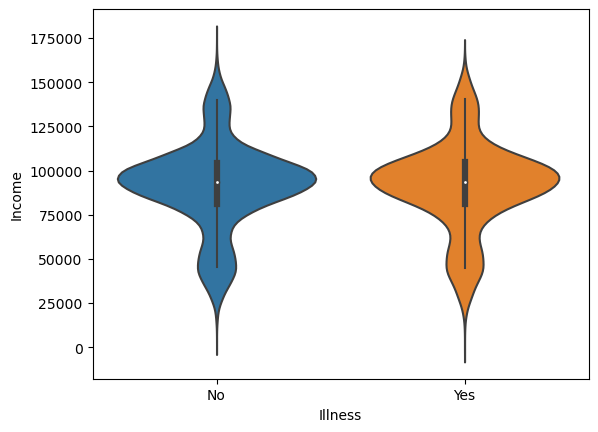

In [ ]:
# Распределение параметра Y сгруппированные по SEX.
sns.violinplot(x='Illness', y='Income', data=data)

Видно, что вне зависимости от пола больше всего и в болеющей и в не болеющей группе - людей среднего достатка.

<AxesSubplot:xlabel='City', ylabel='Income'>

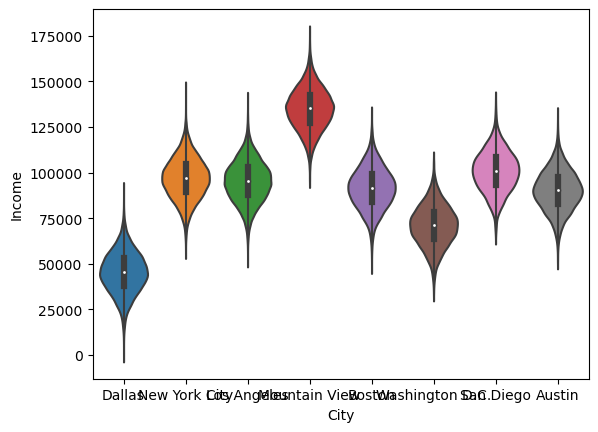

In [ ]:
# Распределение параметра Y сгруппированные по SEX.
sns.violinplot(x='City', y='Income', data=data)

На этом графике можем увидеть распределение людей с разным достатком по разным городам, распределение внутри городов одинаково нормально.